Project question : Can we predict if a player’s age is correlated with whether they have a newsletter subscription?

In [4]:
library(tidyverse)
library(tidymodels)
library(readr)  
library(dplyr) 
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [5]:
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


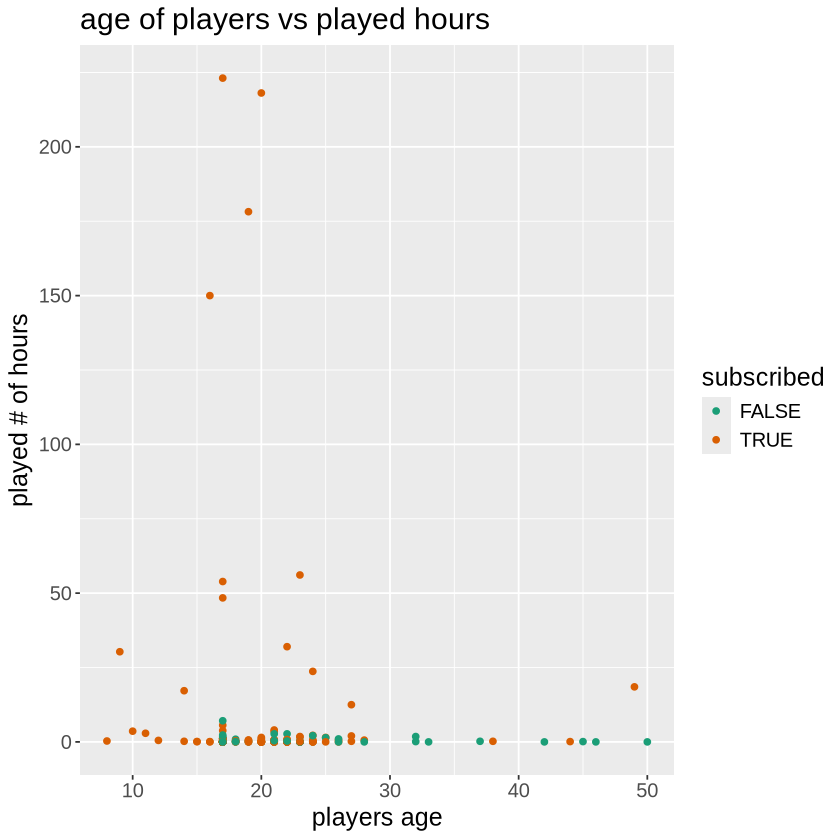

In [55]:
players_plot <- players |>
ggplot(aes(x = Age, y = played_hours, colour = subscribe)) +
    geom_point() +
    scale_color_brewer(palette = "Dark2") +
    labs(title = 'age of players vs played hours', x = 'players age', y = 'played # of hours', colour = 'subscribed') + 
    theme(text = element_text(size = 15))
 players_plot      

In [71]:
players <- players |>
  mutate(subscribe = as.factor(subscribe))
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age,age_group
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<fct>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,NA
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,NA
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,NA


In [72]:
set.seed(333)
data_split <- initial_split(players, strata = subscribe)
players_training <- training(data_split)
players_testing <- testing(data_split)
players_training 
players_testing

experience,subscribe,hashedEmail,played_hours,name,gender,Age,age_group
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<fct>
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,NA
Amateur,FALSE,2313a06afe47eacc28ff55adf6f072e7d12b0d12d7cbae29656f9029ec72bb53,0.0,Quinlan,Male,22,NA
Amateur,FALSE,200db0417ee70863c7e2a0f214c737476fb86de5869d0b907a077d726357e687,0.1,Anastasia,Female,17,NA
Veteran,FALSE,f8acd26a5e452b682b9f8b20108caef1ee2e745efe08e95806980bd2388a3fea,0.0,Finn,Male,23,NA
Veteran,FALSE,951e54f7376e2b2f0915e9e3646c701af4a2fe839385b13f9e0084b08f8070bd,0.1,Vivienne,Male,18,NA
Beginner,FALSE,fa7d496b2f74c51ec70395bd8397b49f97a3ce8d7ba7e08887d82ec0008137a7,0.0,Umar,Male,24,NA
Regular,FALSE,453774822d52d6891593948224570a750c4334616ff8aa74cd61fad9d4855752,0.0,Edmund,Prefer not to say,23,NA
Amateur,FALSE,5c27e8b9fed2816b006dc8397ec04470b59339fd591a46a3eb7951b939b72984,0.9,Pablo,Male,18,NA
Veteran,FALSE,70db3a16ef58cf8bf6d8658c426ba4a5fcd7523a0abdd413f14466c41181215d,0.1,Lana,Male,22,NA


experience,subscribe,hashedEmail,played_hours,name,gender,Age,age_group
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<fct>
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA
Pro,TRUE,4caa42e1b20511552434978171dcf7283fb6eb857eb871327e39bfc328002309,0.0,Daniela,Male,17,NA
Beginner,TRUE,4bed6f49b672974f706aa7f020b4f29020326bf594520593557cd381a51559b8,1.5,Sarah,Female,25,NA
Beginner,TRUE,9db37a1d381697f6c83e3b97b276e38bb9d9c811ba4596edb75d4dbfea6415b0,0.0,Elodie,Female,17,NA
Amateur,TRUE,ab1f44f93c3b828f55458971db393052d9711df3e0e7ff69540bfebfcec555ff,0.5,Marley,Male,17,NA
Regular,TRUE,50cec73a632e4be7b155c3df5165de28b2c5baf092abcb7f509f5645776a56c2,0.0,Iman,Male,17,NA
Amateur,TRUE,710148466b44cb02ba894aa9005a4892e619250ebd01153055d6c7578fc1ea10,0.1,Ayman,Male,23,NA
Veteran,TRUE,f1b432523542f90c61176a555ccb2144468d76c91a32d74082ab8c101f9d25b6,0.1,London,Male,21,NA


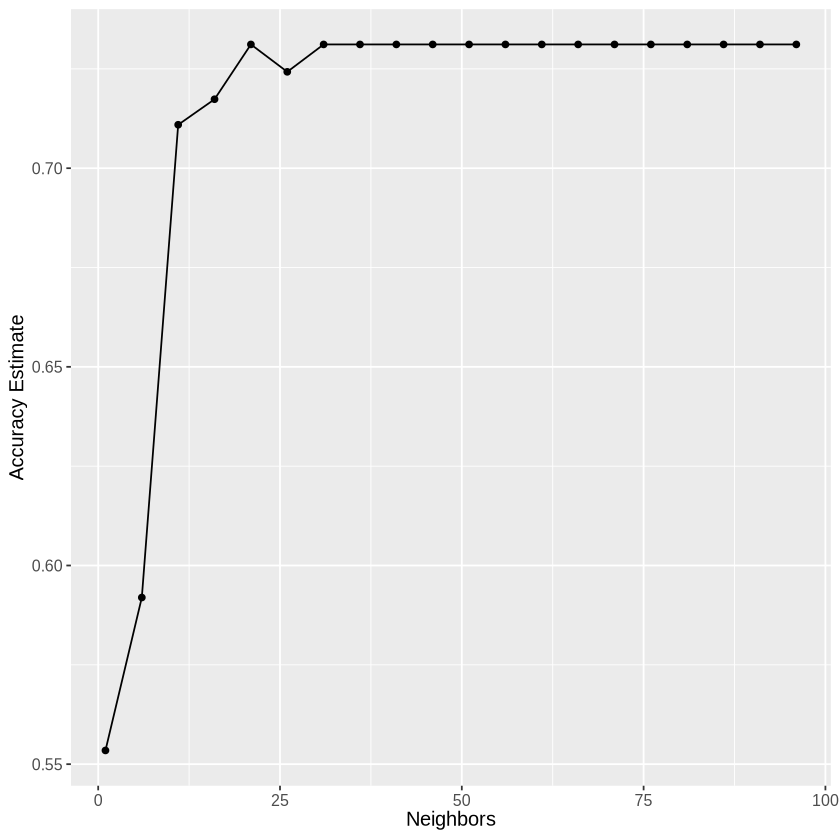

In [78]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))
accuracy_vs_k



In [80]:
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 21

In [83]:
knn_spec2 <- nearest_neighbor(neighbors = 21) |>
  set_engine('kknn') |>
  set_mode('classification')

knn_workflow2 <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec2)

fit <- knn_workflow2 |>
  fit(data = players_training)

test_predictions <- predict(fit, players_testing) |>
    bind_cols(players_testing)

metrics(test_predictions, truth = subscribe, estimate = .pred_class)

conf_mat(test_predictions, truth = subscribe, estimate = .pred_class) 


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7551020
kap,binary,0.1671388


          Truth
Prediction FALSE TRUE
     FALSE     2    1
     TRUE     11   35